<a href="https://colab.research.google.com/github/sreej1305/Concert-Ticket-Success-Predictor/blob/main/Concert_Ticket_Acquisition_Probability_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
np.random.seed(42)

n_samples = 800

data = {
    "age": np.random.randint(16, 45, n_samples),
    "fan_level": np.random.choice(["Casual", "Regular", "Hardcore"], n_samples, p=[0.4, 0.35, 0.25]),
    "fanclub_member": np.random.choice(["Yes", "No"], n_samples, p=[0.3, 0.7]),
    "past_concerts": np.random.randint(0, 10, n_samples),
    "login_minutes_early": np.random.randint(0, 60, n_samples),
    "network_speed": np.random.choice(["Low", "Medium", "High"], n_samples, p=[0.2, 0.5, 0.3]),
    "device": np.random.choice(["Mobile", "Desktop"], n_samples),
    "ticket_type": np.random.choice(["General", "VIP"], n_samples, p=[0.8, 0.2]),
    "artist_popularity": np.random.randint(70, 100, n_samples),  # BTS-like demand
    "venue_capacity": np.random.randint(20000, 70000, n_samples),
}


In [73]:
success_probability = (
    (data["login_minutes_early"] / 60) * 0.30 +
    (data["artist_popularity"] / 100) * -0.40 +
    (np.array(data["fanclub_member"]) == "Yes") * 0.25 +
    (np.array(data["fan_level"]) == "Hardcore") * 0.15 +
    (np.array(data["ticket_type"]) == "VIP") * 0.20 +
    (np.array(data["network_speed"]) == "High") * 0.15 +
    (np.array(data["venue_capacity"]) / 70000) * 0.20
)

success_probability = np.clip(success_probability, 0, 1)

ticket_success = np.random.binomial(1, success_probability)

data["ticket_success"] = ticket_success

df = pd.DataFrame(data)
df.head()


,age,fan_level,fanclub_member,past_concerts,login_minutes_early,network_speed,device,ticket_type,artist_popularity,venue_capacity,ticket_success
0,22,Hardcore,No,5,13,High,Desktop,General,81,50286,1
1,35,Regular,No,1,9,Low,Mobile,General,90,57545,0
2,44,Regular,Yes,0,34,Medium,Mobile,VIP,79,35994,1
3,30,Hardcore,Yes,9,24,Medium,Desktop,General,92,55503,0
4,26,Casual,No,4,2,Medium,Desktop,General,89,66379,0


In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  800 non-null    int64 
 1   fan_level            800 non-null    object
 2   fanclub_member       800 non-null    object
 3   past_concerts        800 non-null    int64 
 4   login_minutes_early  800 non-null    int64 
 5   network_speed        800 non-null    object
 6   device               800 non-null    object
 7   ticket_type          800 non-null    object
 8   artist_popularity    800 non-null    int64 
 9   venue_capacity       800 non-null    int64 
 10  ticket_success       800 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 68.9+ KB


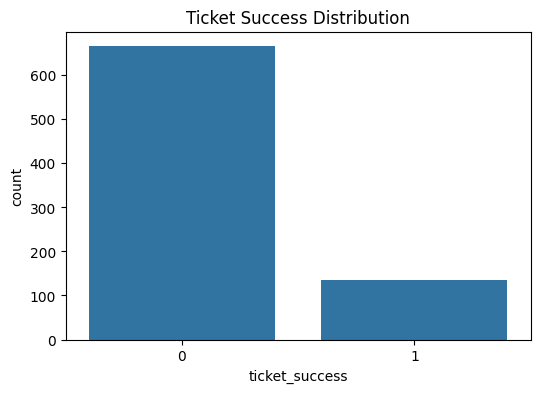

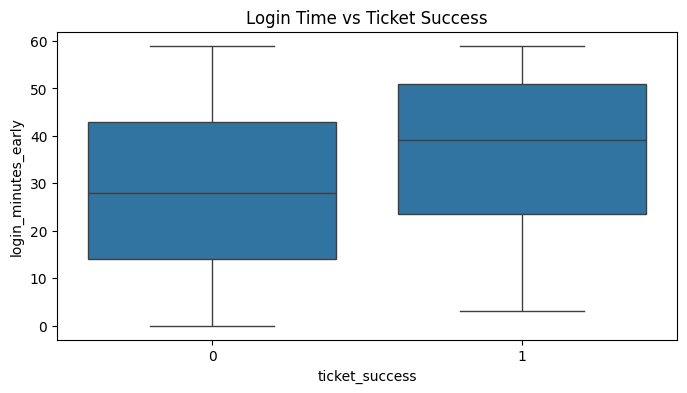

In [75]:
plt.figure(figsize=(6,4))
sns.countplot(x="ticket_success", data=df)
plt.title("Ticket Success Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="ticket_success", y="login_minutes_early", data=df)
plt.title("Login Time vs Ticket Success")
plt.show()



In [76]:
label_encoders = {}

for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,age,fan_level,fanclub_member,past_concerts,login_minutes_early,network_speed,device,ticket_type,artist_popularity,venue_capacity,ticket_success
0,22,1,0,5,13,0,0,0,81,50286,1
1,35,2,0,1,9,1,1,0,90,57545,0
2,44,2,1,0,34,2,1,1,79,35994,1
3,30,1,1,9,24,2,0,0,92,55503,0
4,26,0,0,4,2,2,0,0,89,66379,0


In [77]:
X = df.drop("ticket_success", axis=1)
y = df["ticket_success"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [79]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


Logistic Regression Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       137
           1       0.89      0.35      0.50        23

    accuracy                           0.90       160
   macro avg       0.89      0.67      0.72       160
weighted avg       0.90      0.90      0.88       160



In [80]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       137
           1       0.60      0.13      0.21        23

    accuracy                           0.86       160
   macro avg       0.74      0.56      0.57       160
weighted avg       0.83      0.86      0.82       160



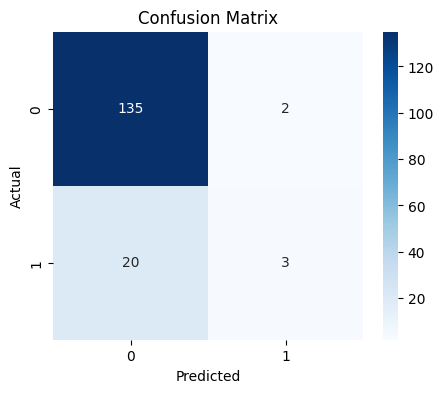

In [81]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


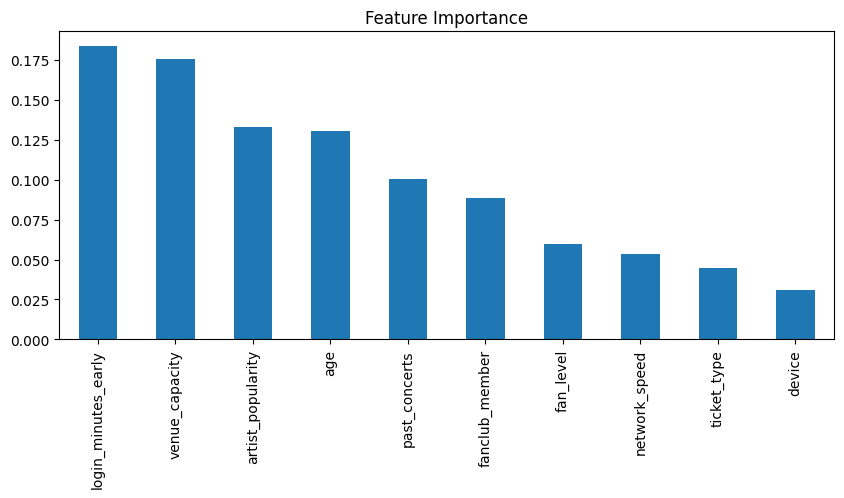

In [82]:
feature_importance = pd.Series(
    rf_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", figsize=(10,4), title="Feature Importance")
plt.show()


In [83]:
sample_user = {
    "age": 22,
    "fan_level": "Hardcore",
    "fanclub_member": "Yes",
    "past_concerts": 3,
    "login_minutes_early": 30,
    "network_speed": "High",
    "device": "Desktop",
    "ticket_type": "General",
    "artist_popularity": 95,
    "venue_capacity": 50000
}

sample_df = pd.DataFrame([sample_user])

for col in sample_df.select_dtypes(include="object").columns:
    sample_df[col] = label_encoders[col].transform(sample_df[col])

sample_scaled = scaler.transform(sample_df)

probability = rf_model.predict_proba(sample_scaled)[0][1]

print(f"🎟 Probability of getting ticket: {probability*100:.2f}%")
print("Prediction:", "Likely" if probability > 0.5 else "Unlikely")


🎟 Probability of getting ticket: 51.50%
Prediction: Likely


In [84]:
df.to_csv("jupyter_concert_ticket_dataset.csv", index=False)


In [85]:
# --- FORCE DISPLAY SETTINGS ---
import pandas as pd
from IPython.display import display

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# --- RE-CREATE 200 SAMPLE PREDICTIONS SAFELY ---

sample_200 = df.sample(200, random_state=42)

X_bulk = sample_200.drop("ticket_success", axis=1)
X_bulk_scaled = scaler.transform(X_bulk)

bulk_predictions = rf_model.predict(X_bulk_scaled)
bulk_probabilities = rf_model.predict_proba(X_bulk_scaled)[:, 1]

results_df = sample_200.copy()
results_df["predicted_success"] = bulk_predictions
results_df["predicted_probability"] = bulk_probabilities
results_df["prediction_label"] = results_df["predicted_probability"].apply(
    lambda x: "Likely" if x > 0.5 else "Unlikely"
)

display(results_df)


,age,fan_level,fanclub_member,past_concerts,login_minutes_early,network_speed,device,ticket_type,artist_popularity,venue_capacity,ticket_success,predicted_success,predicted_probability,prediction_label
696,22,1,0,6,23,0,0,1,89,61576,1,0,0.385,Unlikely
667,17,1,0,7,25,0,0,0,72,33186,0,0,0.155,Unlikely
63,41,1,0,4,50,2,0,0,76,23117,1,0,0.100,Unlikely
533,30,0,0,6,47,2,1,0,97,58506,0,0,0.010,Unlikely
66,36,0,0,6,10,1,0,0,93,24042,0,0,0.010,Unlikely
621,19,0,1,5,11,1,0,0,99,23170,0,0,0.220,Unlikely
346,34,1,1,8,55,2,1,0,86,69692,1,0,0.490,Unlikely
490,16,0,0,2,46,2,1,0,88,35635,0,0,0.005,Unlikely
760,33,2,1,8,44,2,1,0,94,41359,0,0,0.345,Unlikely
456,39,1,0,2,47,1,0,0,99,38174,0,0,0.090,Unlikely


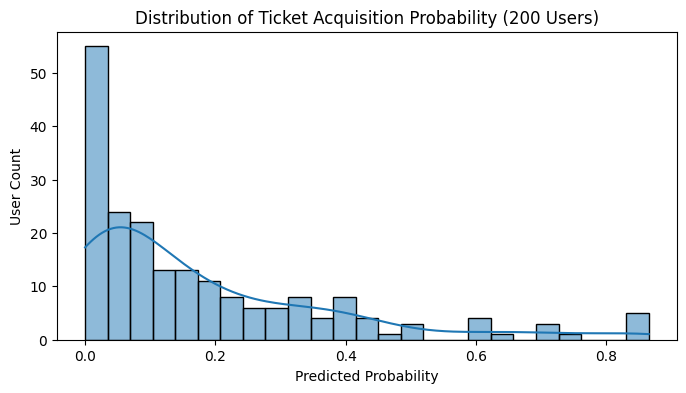

In [86]:
plt.figure(figsize=(8,4))
sns.histplot(results_df["predicted_probability"], bins=25, kde=True)
plt.title("Distribution of Ticket Acquisition Probability (200 Users)")
plt.xlabel("Predicted Probability")
plt.ylabel("User Count")
plt.show()


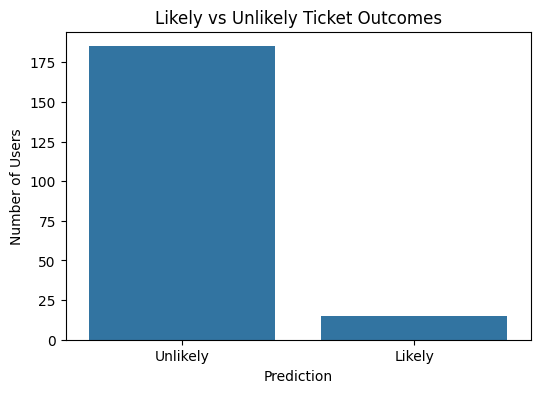

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(x="prediction_label", data=results_df)
plt.title("Likely vs Unlikely Ticket Outcomes")
plt.xlabel("Prediction")
plt.ylabel("Number of Users")
plt.show()


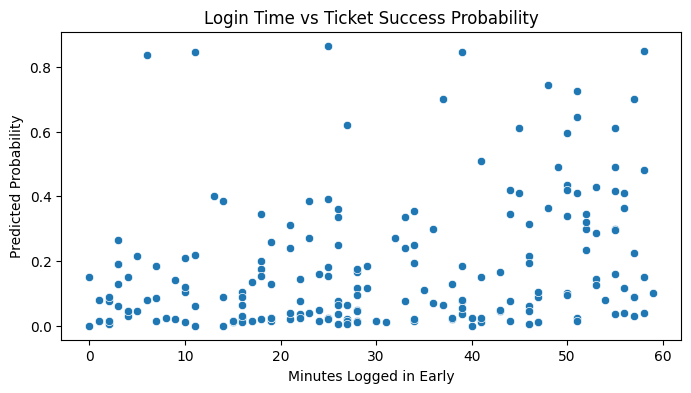

In [88]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="login_minutes_early",
    y="predicted_probability",
    data=results_df
)
plt.title("Login Time vs Ticket Success Probability")
plt.xlabel("Minutes Logged in Early")
plt.ylabel("Predicted Probability")
plt.show()


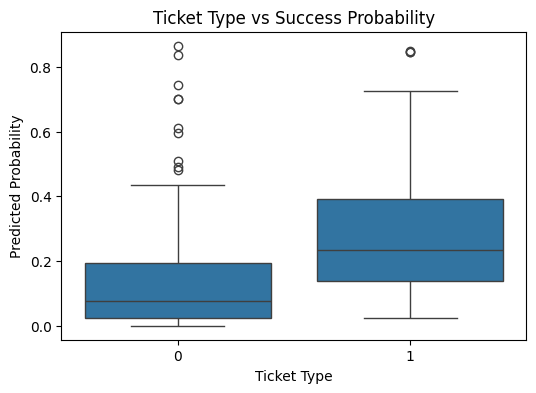

In [89]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="ticket_type",
    y="predicted_probability",
    data=results_df
)
plt.title("Ticket Type vs Success Probability")
plt.xlabel("Ticket Type")
plt.ylabel("Predicted Probability")
plt.show()


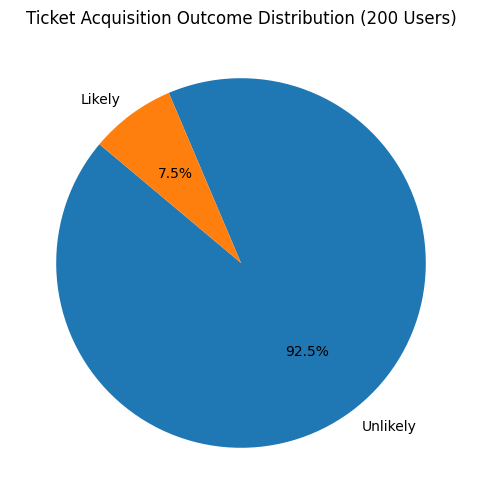

In [90]:
# Pie chart for Likely vs Unlikely predictions
outcome_counts = results_df["prediction_label"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    outcome_counts,
    labels=outcome_counts.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Ticket Acquisition Outcome Distribution (200 Users)")
plt.show()


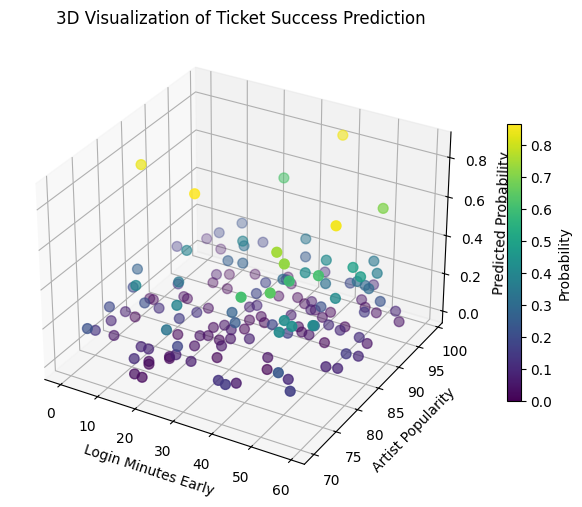

In [91]:
from mpl_toolkits.mplot3d import Axes3D

# Select a smaller sample for clean 3D visualization
sample_3d = results_df.sample(150, random_state=42)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

x = sample_3d["login_minutes_early"]
y = sample_3d["artist_popularity"]
z = sample_3d["predicted_probability"]

scatter = ax.scatter(
    x, y, z,
    c=z,
    cmap="viridis",
    s=50
)

ax.set_xlabel("Login Minutes Early")
ax.set_ylabel("Artist Popularity")
ax.set_zlabel("Predicted Probability")

ax.set_title("3D Visualization of Ticket Success Prediction")

fig.colorbar(scatter, ax=ax, shrink=0.6, label="Probability")
plt.show()


In [92]:
# Simulate time elapsed since ticket sale opened (in minutes)
results_df["time_since_sale_open"] = np.random.randint(0, 60, len(results_df))


In [93]:
# Apply time decay to predicted probability
decay_rate = 0.015  # faster decay for high-demand concerts like BTS

results_df["time_adjusted_probability"] = (
    results_df["predicted_probability"] *
    np.exp(-decay_rate * results_df["time_since_sale_open"])
)

results_df.head()


,age,fan_level,fanclub_member,past_concerts,login_minutes_early,network_speed,device,ticket_type,artist_popularity,venue_capacity,ticket_success,predicted_success,predicted_probability,prediction_label,time_since_sale_open,time_adjusted_probability
696,22,1,0,6,23,0,0,1,89,61576,1,0,0.385,Unlikely,13,0.316791
667,17,1,0,7,25,0,0,0,72,33186,0,0,0.155,Unlikely,3,0.148180
63,41,1,0,4,50,2,0,0,76,23117,1,0,0.100,Unlikely,25,0.068729
533,30,0,0,6,47,2,1,0,97,58506,0,0,0.010,Unlikely,46,0.005016
66,36,0,0,6,10,1,0,0,93,24042,0,0,0.010,Unlikely,47,0.004941


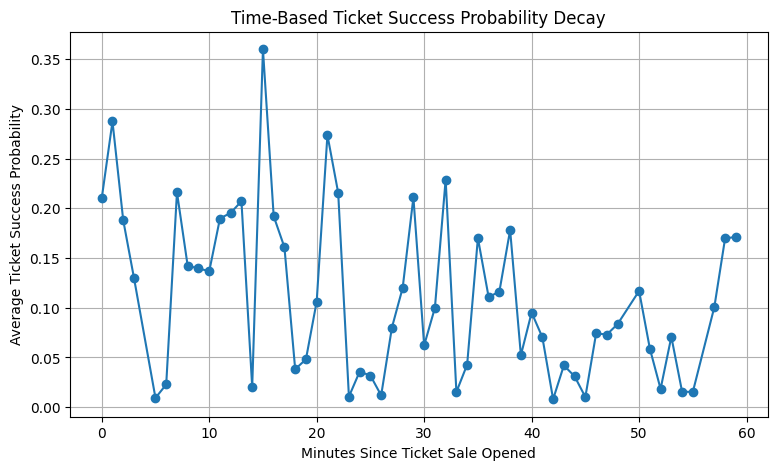

In [94]:
# Average probability over time
time_grouped = results_df.groupby("time_since_sale_open")[
    "time_adjusted_probability"
].mean().reset_index()

plt.figure(figsize=(9,5))
plt.plot(
    time_grouped["time_since_sale_open"],
    time_grouped["time_adjusted_probability"],
    marker="o"
)

plt.xlabel("Minutes Since Ticket Sale Opened")
plt.ylabel("Average Ticket Success Probability")
plt.title("Time-Based Ticket Success Probability Decay")
plt.grid(True)
plt.show()


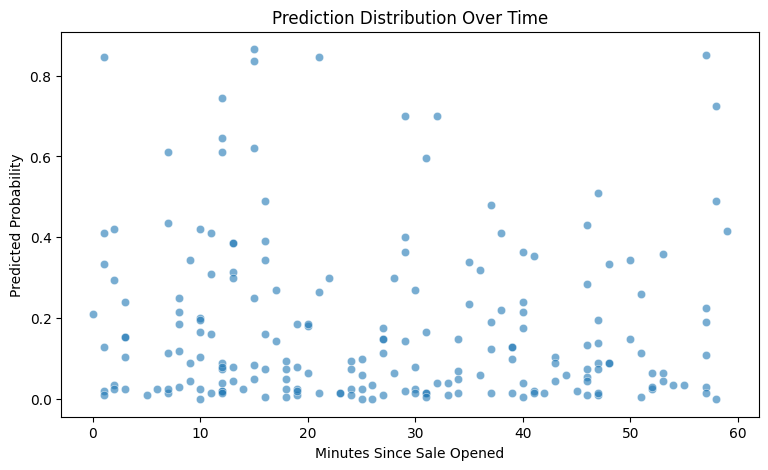

In [95]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    x="time_since_sale_open",
    y="predicted_probability",
    data=results_df,
    alpha=0.6
)
plt.title("Prediction Distribution Over Time")
plt.xlabel("Minutes Since Sale Opened")
plt.ylabel("Predicted Probability")
plt.show()


In [96]:
sample_user_time = results_df.iloc[0]

print("Time since sale opened:", sample_user_time["time_since_sale_open"], "minutes")
print("Original Probability:", round(sample_user_time["predicted_probability"], 2))
print("Time-Adjusted Probability:", round(sample_user_time["time_adjusted_probability"], 2))


Time since sale opened: 13 minutes
Original Probability: 0.38
Time-Adjusted Probability: 0.32
